## Stock portfolio optimization using python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as snss
import statsmodels.api as sm
import pandas_datareader
import datetime
import pandas_datareader.data as web

In [3]:
start= datetime.datetime(2019,1,1)
end= datetime.datetime.today()



In [4]:
aapl = web.DataReader('AAPL', 'yahoo', start, end)['Adj Close']
ibm = web.DataReader('IBM', 'yahoo', start, end)['Adj Close']
amzn = web.DataReader('AMZN', 'yahoo', start, end)['Adj Close']

#Alternative way to download portfolio data:
#aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)

aapl.head()

TypeError: string indices must be integers

In [ ]:
aapl.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 980 entries, 2018-12-31 to 2022-11-17
Series name: Adj Close
Non-Null Count  Dtype  
--------------  -----  
980 non-null    float64
dtypes: float64(1)
memory usage: 15.3 KB


In [ ]:
aapl = aapl[['Adj Close']]
ibm = ibm[['Adj Close']]
amzn = amzn[['Adj Close']]

KeyError: "None of [Index(['Adj Close'], dtype='object', name='Date')] are in the [index]"

In [ ]:
aapl.head()

,Adj Close
Date,
2018-12-31,38.061703
2019-01-02,38.105141
2019-01-03,34.309578
2019-01-04,35.774239
2019-01-07,35.694611


In [ ]:
for stock_df in (aapl, ibm, amzn):
    stock_df['Normed Return'] = stock_df['Adj Close']/ stock_df.iloc[0]['Adj Close']

## Allocation: 

20% to Apple, 30% to IBM and 50% to Amazon stocks. And assume that the initial investment was 500,000.

In [ ]:
for stock_df, allo in zip((aapl, ibm,amzn),[0.2,0.3,0.5]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [ ]:
for stock_df in (aapl, ibm, amzn):
    stock_df['Position Amount']= stock_df['Allocation']*500000

## Portfolio Value:

<AxesSubplot:xlabel='Date'>

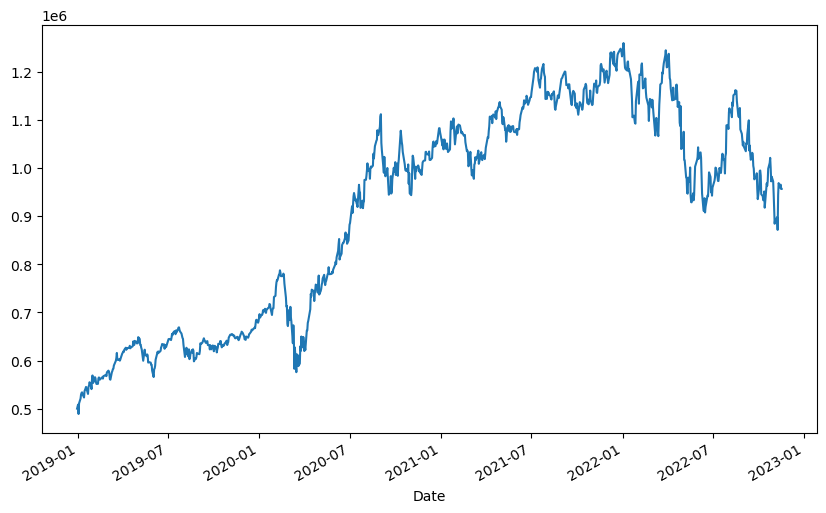

In [ ]:
total_pos_vals = [aapl['Position Amount'], ibm['Position Amount'], amzn['Position Amount']]
portf_vals = pd.concat(total_pos_vals, axis = 1)
portf_vals.columns = ['Apple Pos', 'IBM Pos', 'Amazon Pos']
portf_vals['Total Pos'] = portf_vals.sum(axis=1)
portf_vals['Total Pos'].plot(figsize = (10,6))

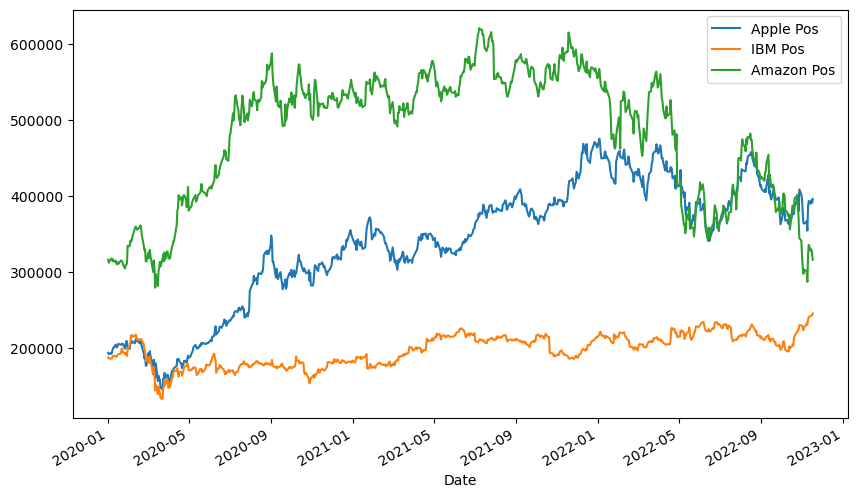

In [ ]:
portf_vals['2020-01-01':].drop('Total Pos', axis = 1).plot(figsize=(10,6));

## Portfolio Statistics

In [ ]:
portf_vals['Daily Return'] = portf_vals['Total Pos'].pct_change(1)
portf_vals.dropna(inplace = True)
print('Daily Return Average: ',portf_vals['Daily Return'].mean())
print('Daily Return Standard Deviation: ',portf_vals['Daily Return'].std())

Daily Return Average:  0.000819239835050914
Daily Return Standard Deviation:  0.017644062686825644


To look at the distribution, let's take a look at a histogram and a KDE plot:

<AxesSubplot:ylabel='Density'>

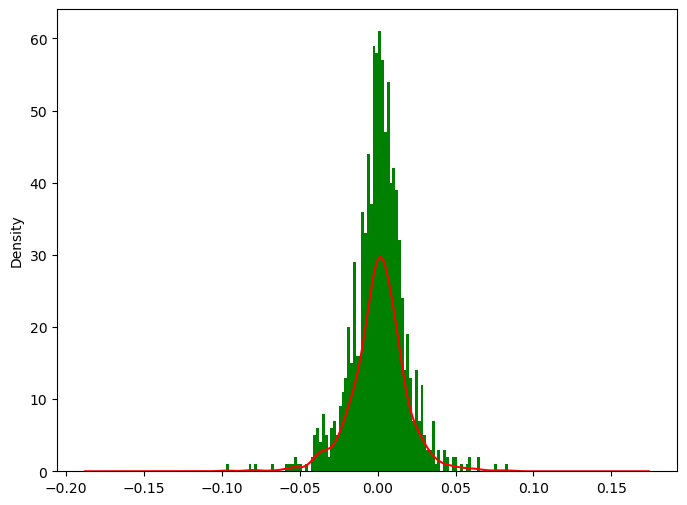

In [ ]:
portf_vals['Daily Return'].plot(kind = 'hist', bins=100, figsize = (6,8), color = 'green')
portf_vals['Daily Return'].plot(kind = 'kde', figsize = (8,6), color = 'r')

In [ ]:
cumulative_return = 100*(portf_vals['Total Pos'][-1]/portf_vals['Total Pos'][0]-1)
print('Cumulative return: ', cumulative_return)

Cumulative return:  88.24709077957873


## Sharpe Ration

In [ ]:
SR = portf_vals['Daily Return'].mean()/portf_vals['Daily Return'].std()
print('Sharpe Ration = ', SR)

Sharpe Ration =  0.04643147383865388


In [ ]:
#Annual Sharpe Ratio:
ASR = (252**0.5) * SR
print('Annualized Sharpe Ratio = ', ASR)

Annualized Sharpe Ratio =  0.7370767966996785


Now let's allocate our securities in a most optimal way:

In [ ]:
stocks = pd.concat([aapl['Adj Close'], ibm['Adj Close'], amzn['Adj Close']], axis = 1)
stocks.columns = ['Apple', 'IBM', 'Amazon']
stocks.head()

,Apple,IBM,Amazon
Date,,,
2018-12-31,38.061703,89.377647,75.098503
2019-01-02,38.105141,90.588539,76.956497
2019-01-03,34.309578,88.780052,75.014000
2019-01-04,35.774239,92.247604,78.769501
2019-01-07,35.694611,92.900223,81.475502


To calculate Mean Daily Return:

In [ ]:
stocks.pct_change(1).mean()

Apple     0.001644
IBM       0.000663
Amazon    0.000493
dtype: float64

To calculate correlation between stocks:

In [ ]:
stocks.pct_change(1).corr()

,Apple,IBM,Amazon
Apple,1.000000,0.454429,0.649191
IBM,0.454429,1.000000,0.300273
Amazon,0.649191,0.300273,1.000000


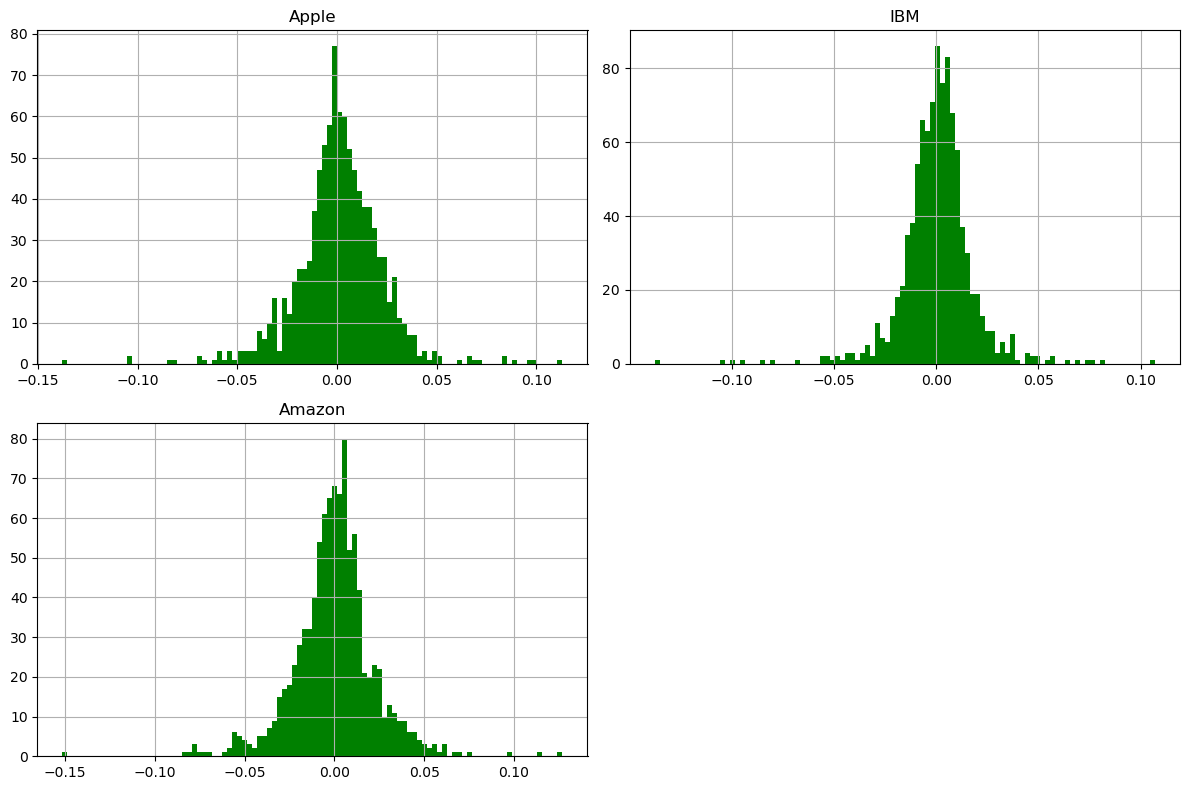

In [ ]:
log_returns = np.log(stocks/stocks.shift(1))
log_returns.hist(bins = 100, figsize = (12,8), color = 'g')
plt.tight_layout()

Covarience of the columns:

In [ ]:
log_returns.cov()*252

,Apple,IBM,Amazon
Apple,0.119866,0.045074,0.080772
IBM,0.045074,0.081385,0.030918
Amazon,0.080772,0.030918,0.128278


## Sharpe Ration for One Portfolio

In [ ]:
np.random.seed(101)
print(stocks.columns)

weights = np.array(np.random.random(3))

print('Random Weights: ')
print(weights)

#However, their sum must be equal to 100
print('Rebalance')
weights = weights/np.sum(weights)
print(weights)

Index(['Apple', 'IBM', 'Amazon'], dtype='object')
Random Weights: 
[0.51639863 0.57066759 0.02847423]
Rebalance
[0.46291341 0.51156154 0.02552505]


Expected Return:

In [ ]:
exp_ret = np.sum((log_returns.mean() * weights) * 252)
print('Expected Portfolio Return: ',exp_ret)

Expected Portfolio Return:  0.23021972936360288


Expected Volatility or Expected 

In [ ]:
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 252, weights)))
print('Expected Volatility: ', exp_vol)

Expected Volatility:  0.266705202693264


The Sharpe Ratio:

In [ ]:
SR = exp_ret/exp_vol
print('Sharpe Ratio: ', SR)

Sharpe Ratio:  0.8631992441046499


# Choosing an optimal portfolio allocation.

In [ ]:
num_ports = 5000
all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):
    weights = np.array(np.random.random(3))
    weights = weights / np.sum(weights)
    all_weights[ind,:] = weights
    ret_arr[ind] = np.sum((log_returns.mean() * weights) *252)
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [ ]:
sharpe_arr.max()

1.0214491651703297

Index location for the best allocation:

In [ ]:
sharpe_arr.argmax()

1663

Here is the optimal allocation for our portfolio

In [ ]:
all_weights[sharpe_arr.argmax(),:]

array([0.98740202, 0.00966633, 0.00293165])

Let's plot the data:

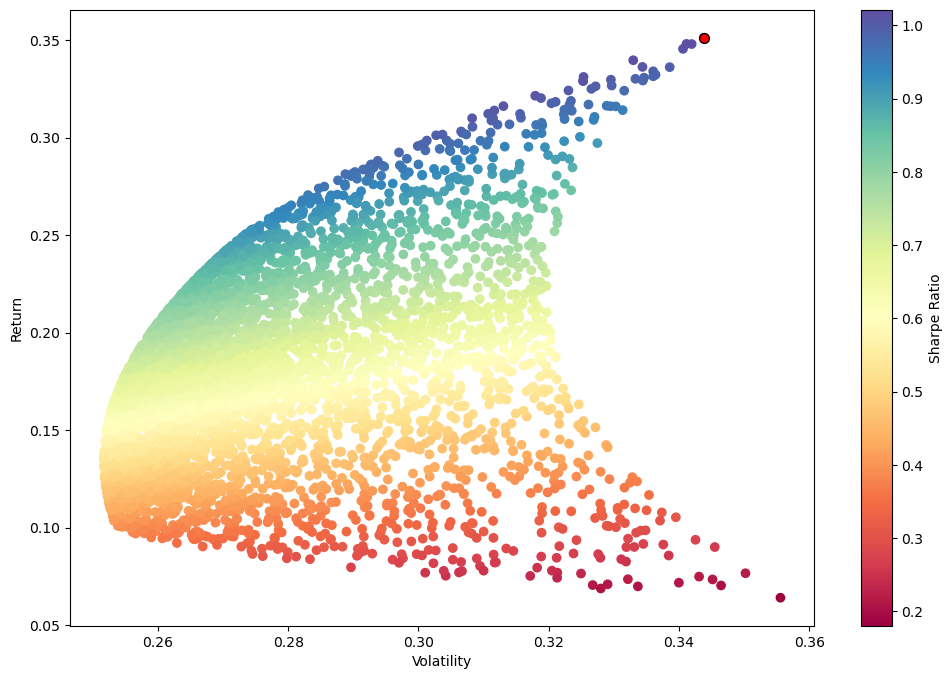

In [ ]:
plt.figure(figsize = (12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='Spectral')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black');

So our Optimal Sharpe Ration is 1.36 and Optimal Portfolio Allocation is 27.9% for Aplle, 0.2% for IBM, and 71.8% for Amazon. So, I would conclude to substitute IMB shares to something more profitable.